# Import Libraries

In [ ]:
import pandas as pd 
import numpy as np 

# Exploring Data

Data Description
Variable	Definition

*   ID	UniqueID
*   Estimated_Insects_Count	Estimated insects count per square meter
*   Crop_Type	Category of Crop(0,1)
*   Soil_Type	Category of Soil (0,1)
*   Pesticide_Use_Category	Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
*   Number_Doses_Week	Number of doses per week
*   Number_Weeks_Used	Number of weeks used
*   Number_Weeks_Quit	Number of weeks quit
*   Season	Season Category (1,2,3)
*   Crop_Damage	Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)
 




In [ ]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competitions/Agriculture/train_yaOffsB.csv')

In [ ]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [ ]:
train['Number_Weeks_Quit'].unique()

array([ 0,  1,  9,  4, 13,  3, 14,  6,  2, 12, 15, 10,  8, 11,  7,  5, 17,
       18, 16, 20, 21, 19, 22, 24, 23, 27, 25, 28, 26, 29, 30, 31, 33, 32,
       36, 37, 34, 39, 44, 41, 35, 47, 46, 40, 42, 38, 43, 45, 49, 50, 48])

 Continous Variables

1.   Estimated_Insects_Count
2.   Number_Weeks_Used
3.   Number_Weeks_Quit
4.   Number_Doses_

Binary Variables ( 0,1) 

1.   Crop Type
2.   Soil Type

Categorical Varibale (one hot encoding required) 

1.   Pesticide Use Category
2.   Season 









# Creating functions for feature engg

In [ ]:
def fill_weeks_used(data,knn):
  fill=pd.DataFrame(knn.transform(data[['Number_Weeks_Used']]),columns=['Number_Weeks_Used'])
  data.drop('Number_Weeks_Used',axis=1,inplace=True)
  data=pd.concat([data,fill],axis=1)

  return data

In [ ]:
def ohe_variables(data,ohe):
  ohe_table=pd.DataFrame(ohe.transform(data[['Pesticide_Use_Category','Season']]),columns=['Never','PrevUsed','Season1','Season2'])
  data.drop(['Season','Pesticide_Use_Category'],axis=1,inplace=True)
  data=pd.concat([data,ohe_table],axis=1)

  return data

## Applying functions

In [ ]:
from sklearn.impute import KNNImputer
knn_weeks_used=KNNImputer()
knn_weeks_used.fit(train[['Number_Weeks_Used']])

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [ ]:
train=fill_weeks_used(train,knn_weeks_used)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,drop='first')
ohe_table=pd.DataFrame(ohe.fit_transform(train[['Pesticide_Use_Category','Season']]),columns=['Never','PrevUsed','Season1','Season2'])
train=pd.concat([train,ohe_table],axis=1)

In [ ]:
train.drop(['Season','Pesticide_Use_Category'],axis=1,inplace=True)

In [ ]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Quit,Crop_Damage,Number_Weeks_Used,Never,PrevUsed,Season1,Season2
0,F00000001,188,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,F00000003,209,1,0,0,0,1,0.0,0.0,0.0,1.0,0.0
2,F00000004,257,1,0,0,0,1,0.0,0.0,0.0,1.0,0.0
3,F00000005,257,1,1,0,0,1,0.0,0.0,0.0,1.0,0.0
4,F00000006,342,1,0,0,0,1,0.0,0.0,0.0,1.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Quit        88858 non-null  int64  
 6   Crop_Damage              88858 non-null  int64  
 7   Number_Weeks_Used        88858 non-null  float64
 8   Never                    88858 non-null  float64
 9   PrevUsed                 88858 non-null  float64
 10  Season1                  88858 non-null  float64
 11  Season2                  88858 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 8.1+ MB


# Visualization of Data

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_cropdamage_alive=train[train['Crop_Damage']==0]
train_cropdamage_other=train[train['Crop_Damage']==1]
train_cropdamage_pesticide=train[train['Crop_Damage']==2]

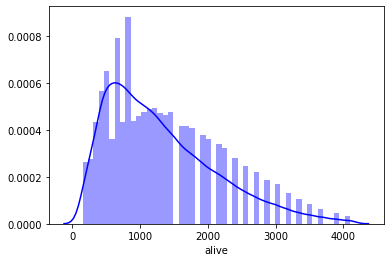

In [ ]:
sns.distplot(train_cropdamage_alive['Estimated_Insects_Count'],color='blue',axlabel='alive')

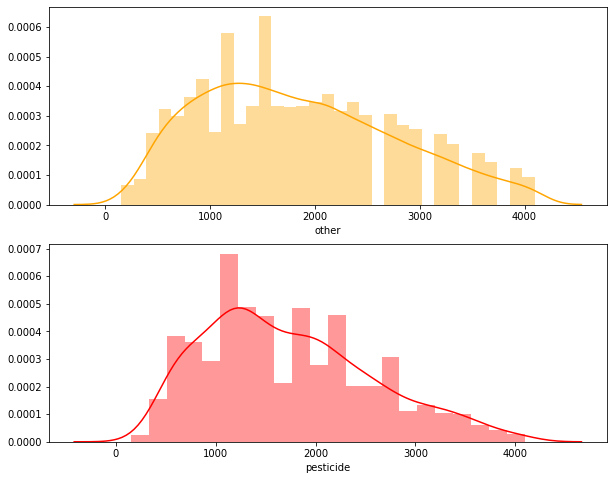

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.distplot(train_cropdamage_other['Estimated_Insects_Count'],ax=ax1,color='orange',axlabel='other')
sns.distplot(train_cropdamage_pesticide['Estimated_Insects_Count'],ax=ax2,color='red',axlabel='pesticide')
plt.show()

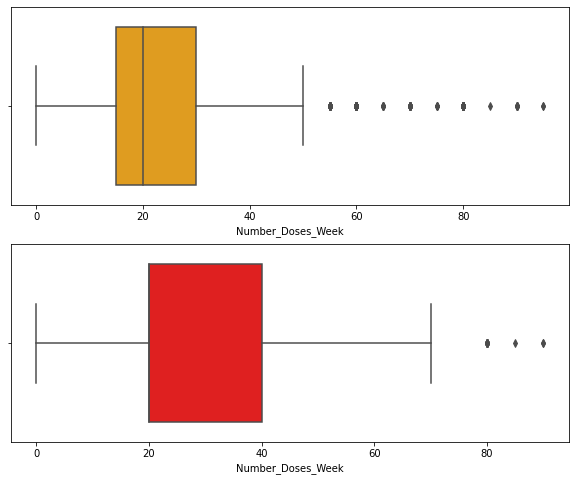

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.boxplot(train_cropdamage_other['Number_Doses_Week'],ax=ax1,color='orange')
sns.boxplot(train_cropdamage_pesticide['Number_Doses_Week'],ax=ax2,color='red')
plt.show()

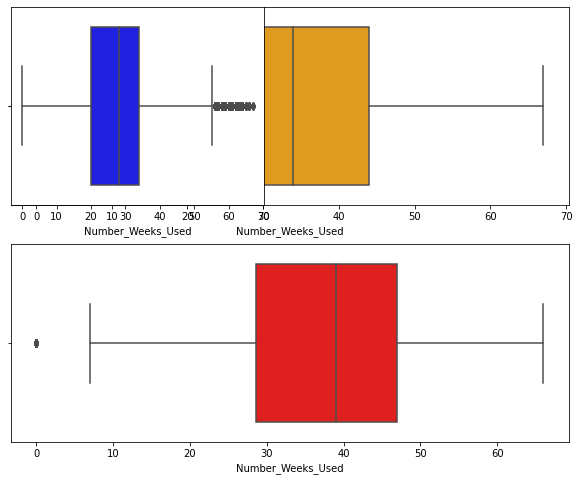

<bound method Figure.align_ylabels of <Figure size 720x576 with 3 Axes>>

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax3=fig.add_subplot(221)
sns.boxplot(train_cropdamage_other['Number_Weeks_Used'],ax=ax1,color='orange')
sns.boxplot(train_cropdamage_pesticide['Number_Weeks_Used'],ax=ax2,color='red')
sns.boxplot(train_cropdamage_alive['Number_Weeks_Used'],ax=ax3,color='blue')
plt.show()
fig.align_xlabels
fig.align_ylabels

# Feature Engg

In [ ]:
train['Total_doses']=train['Number_Doses_Week']*train['Number_Weeks_Used']

In [ ]:
train['Total_weeks']=train['Number_Doses_Week']+train['Number_Weeks_Quit']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled_ss=ss.fit_transform(x)

# Basic Preprocessing

In [ ]:
ohe_targets=OneHotEncoder(sparse=False)
y_ohe=pd.DataFrame(ohe_targets.fit_transform(train[['Crop_Damage']]),columns=['0','1','2'])
y=train['Crop_Damage']

In [ ]:
x=train.drop('Crop_Damage',axis=1)

In [ ]:
id=x.drop('ID',axis=1,inplace=True)

# Feature analysis

In [ ]:
from sklearn.feature_selection import mutual_info_classif
relation_targets=pd.DataFrame(mutual_info_classif(x_scaled,y),columns=['Relation_with_target'])
relation_targets['columns']=x.columns

In [ ]:
relation_targets.sort_values('Relation_with_target')

,Relation_with_target,columns
9,0.000023,Season2
1,0.001022,Crop_Type
8,0.004575,Season1
2,0.005418,Soil_Type
3,0.018350,Number_Doses_Week
0,0.022916,Estimated_Insects_Count
7,0.023813,PrevUsed
4,0.029502,Number_Weeks_Quit
10,0.031831,Total_doses
11,0.035775,Total_weeks


# Feature Selection

In [ ]:
features=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Weeks_Quit', 'Number_Weeks_Used', 'Never',
       'PrevUsed', 'Season1', 'Season2', 'Total_doses']

In [ ]:
x=x[features]

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x)

In [ ]:
ss=StandardScaler()
x_scaled_ss=ss.fit_transform(x)

# Model Selection

In [ ]:
import seaborn as sns
sns.pairplot(x,hue=y)

In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models=[]
models.append(("LogReg",LogisticRegression()))
models.append(("DesicionTree",DecisionTreeClassifier()))
models.append(("kNN",KNeighborsClassifier()))
models.append(("RandomForest",RandomForestClassifier()))

In [ ]:
skf_10=StratifiedKFold(n_splits=10,shuffle=True)

In [ ]:
names=[]
result=[]
scoring='accuracy'
for name,model in models:
  cv_result=cross_val_score(model,x_scaled_ss,y,scoring=scoring,cv=skf_10)
  print("Model created: %s ------> Validation Accuracy: %.4f" % (name,cv_result.mean()))
  print("-----------------------------------------------")

Model created: LogReg ------> Validation Accuracy: 0.84
-----------------------------------------------
Model created: DesicionTree ------> Validation Accuracy: 0.75
-----------------------------------------------
Model created: kNN ------> Validation Accuracy: 0.83
-----------------------------------------------
Model created: RandomForest ------> Validation Accuracy: 0.82
-----------------------------------------------


# Hyperparameter Tuning of Log Reg

In [ ]:
pip install optuna

In [ ]:
import optuna

def objective(trial):
   
    max_iter = trial.suggest_int('max_iter', 100, 300)
    tol = int(trial.suggest_float('tol',0.00001,0.001))
    
    clf = LogisticRegression(
        max_iter=max_iter, tol=tol)
    
    return cross_val_score(
        clf, x_scaled_ss, y, n_jobs=-1, cv=3,scoring=scoring).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2020-08-11 12:44:01,171] Trial 0 finished with value: 0.838551392769955 and parameters: {'max_iter': 297, 'tol': 0.0005070349350292825}. Best is trial 0 with value: 0.838551392769955.
[I 2020-08-11 12:44:03,905] Trial 1 finished with value: 0.838551392769955 and parameters: {'max_iter': 214, 'tol': 0.00042097612172422574}. Best is trial 0 with value: 0.838551392769955.
[I 2020-08-11 12:44:06,633] Trial 2 finished with value: 0.838551392769955 and parameters: {'max_iter': 197, 'tol': 0.0007436014906851904}. Best is trial 0 with value: 0.838551392769955.
[I 2020-08-11 12:44:09,357] Trial 3 finished with value: 0.838551392769955 and parameters: {'max_iter': 128, 'tol': 0.0009408580410104}. Best is trial 0 with value: 0.838551392769955.
[I 2020-08-11 12:44:12,103] Trial 4 finished with value: 0.838551392769955 and parameters: {'max_iter': 200, 'tol': 0.0005652581909800169}. Best is trial 0 with value: 0.838551392769955.
[I 2020-08-11 12:44:14,861] Trial 5 finished with value: 0.83855139

Accuracy: 0.838551392769955
Best hyperparameters: {'max_iter': 297, 'tol': 0.0005070349350292825}


# Hyperparameter Tuning of RandomForest

In [ ]:
import optuna

def objective(trial):
   
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)
    max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,max_samples=max_samples,criterion='entropy')
    
    return cross_val_score(
        clf, x, y, n_jobs=-1, cv=5,scoring=scoring).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2020-08-11 13:28:08,426] Trial 0 finished with value: 0.840385780265762 and parameters: {'n_estimators': 150, 'max_depth': 7.415748728529372, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_samples': 0.6436247239788194}. Best is trial 0 with value: 0.840385780265762.
[I 2020-08-11 13:28:32,437] Trial 1 finished with value: 0.8439982720623581 and parameters: {'n_estimators': 117, 'max_depth': 16.602822625951486, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_samples': 0.6744448328703871}. Best is trial 1 with value: 0.8439982720623581.
[I 2020-08-11 13:29:02,380] Trial 2 finished with value: 0.8442346007683492 and parameters: {'n_estimators': 130, 'max_depth': 15.702462994556367, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_samples': 0.8163325242663281}. Best is trial 2 with value: 0.8442346007683492.
[I 2020-08-11 13:29:42,844] Trial 3 finished with value: 0.8442233572430651 and parameters: {'n_estimators': 194, 'max_depth': 25.353315023813636, 'min_samples_split':

Accuracy: 0.8450223745203264
Best hyperparameters: {'n_estimators': 121, 'max_depth': 20.361764038678608, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_samples': 0.6825086541719386}


# Test 

In [ ]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competitions/Agriculture/test_pFkWwen.csv')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [ ]:
test=fill_weeks_used(test,knn_weeks_used)

In [ ]:
ohe_table_test=pd.DataFrame(ohe.transform(test[['Pesticide_Use_Category','Season']]),columns=['Never','PrevUsed','Season1','Season2'])
test=pd.concat([test,ohe_table_test],axis=1)

In [ ]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Number_Weeks_Used,Never,PrevUsed,Season1,Season2
0,F00000002,188,1,1,1,0,0,2,28.62397,0.0,0.0,1.0,0.0
1,F00000007,410,1,1,1,0,0,2,0.00000,0.0,0.0,1.0,0.0
2,F00000011,626,1,0,1,0,0,2,0.00000,0.0,0.0,1.0,0.0
3,F00000013,731,1,0,1,0,0,2,0.00000,0.0,0.0,1.0,0.0
4,F00000014,789,0,0,1,0,0,1,0.00000,0.0,0.0,0.0,0.0


In [ ]:
test_id=test['ID']
test.drop('ID',axis=1,inplace=True)

In [ ]:
test['Total_doses']=test['Number_Doses_Week']*test['Number_Weeks_Used']

In [ ]:
train['Total_weeks']=train['Number_Doses_Week']+train['Number_Weeks_Quit']

In [ ]:
rf_final=RandomForestClassifier(n_estimators=121, max_depth=20.361764038678608,
                                min_samples_split= 9,min_samples_leaf= 6,max_samples= 0.6825086541719386)

In [ ]:
rf_final.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20.361764038678608,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=0.6825086541719386,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred=rf_final.predict(test[features])

In [ ]:
y.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [ ]:
result=pd.DataFrame()
result['ID']=test_id
result['Crop_Damage']=pred

In [ ]:
result

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0


In [ ]:
result['Crop_Damage'].value_counts()

0    56752
1     2547
2       11
Name: Crop_Damage, dtype: int64

In [ ]:
result.to_csv('Submission1.csv',index=False)